In [2]:
from IPython.display import Latex
Latex(r"""\begin{eqnarray} \large 
Z_{n+1} = (b - a*Z_{n}) / (d + c*Z_{n}^x)
\end{eqnarray}""")

<IPython.core.display.Latex object>

# flowerish figure: a numerical discovery.

    Sequential iteration of difference equation:
    Z = (b - a*Z) / (d + c*Z^x);
    
    with parameter set:
    x = 1.2759;
    a = 0 + 0.074647i;
    b = -0.77504 + 0.007449i;
    c = 1.2902 - 2.238e-18i;
    d = 0.12875;
    on the complex plane produces a flower like figure.

In [3]:
import warnings
warnings.filterwarnings('ignore')

import os
import sys   
import numpy as np
import time

from IPython.display import SVG
from IPython.display import Image
from IPython.display import display

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as ip

sys.path.insert(1, '../src');   import z_plane as zp
import graphic_utility as gu;   import itergataters as ig

In [4]:
def de_Okeeffe(Z, p, Z0=None, ET=None):
    """ Z = de_Okeeffe(Z, p) 
    Args:
        Z:    a real or complex number
        p:    a real of complex number
    Returns:
        Z:    the result (complex)
    """
    Z = (p[2] - p[1]*Z) / (p[4] + p[3]*Z**p[0]);
    return Z

In [7]:
#                                        -- machine with 8 cores --
par_set = {'n_rows': 800, 'n_cols': 800}
par_set['center_point'] = -0.1-0.1j
par_set['theta'] = 0.0
par_set['zoom'] = 0.3

par_set['it_max'] = 128
par_set['max_d'] = 10 / par_set['zoom']
par_set['dir_path'] = os.getcwd()

x = 1.2759;
a = 0 + 0.074647j;
b = -0.77504 + 0.007449j;
c = 1.2902 - 2.238e-18j;
d = 0.12875;
p = [x, a, b, c, d]
list_tuple = [(de_Okeeffe, (p))]

t0 = time.time()
ET, Z, Z0 = ig.get_primitives(list_tuple, par_set)
tt = time.time() - t0
print(tt, '\t total time')

111.6981508731842 	 total time


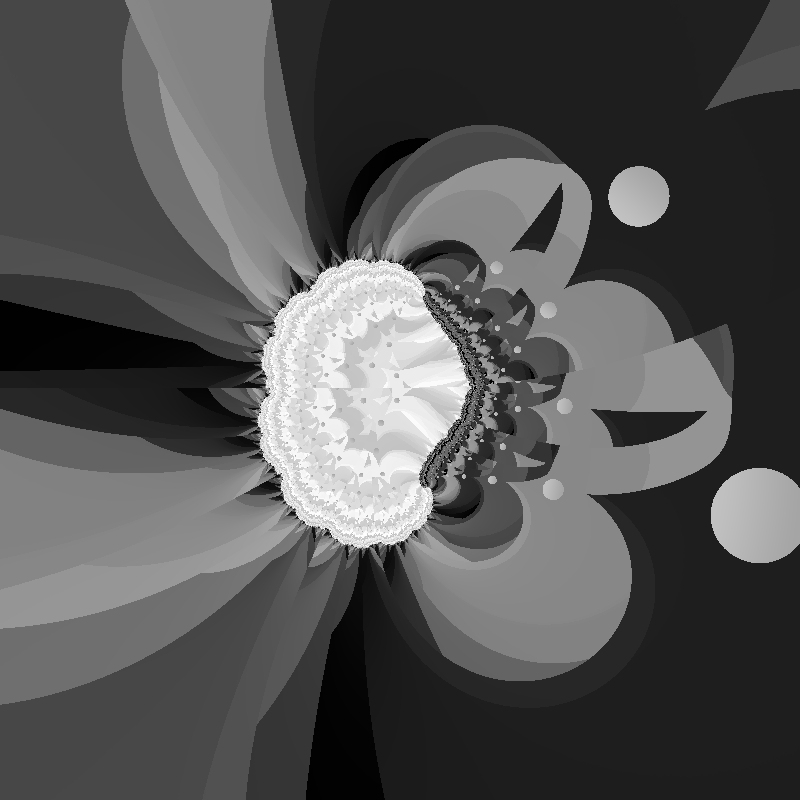

In [8]:
Mz = gu.mat2graphic(Z)
display(gu.mat_to_gray(Mz))

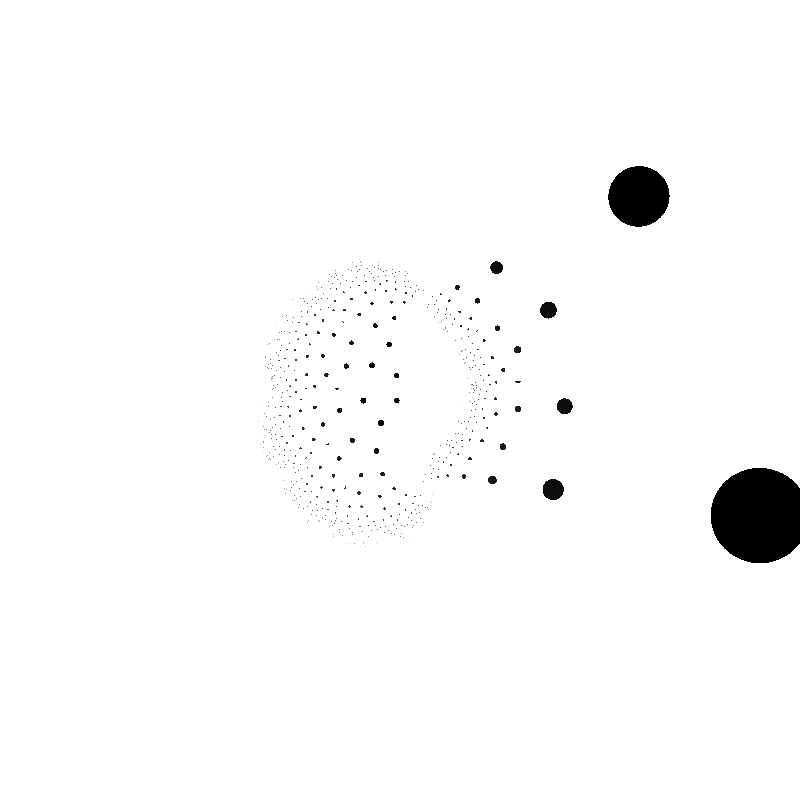

In [11]:
M_et = gu.mat2graphic(ET)
display(gu.mat_to_gray(M_et))

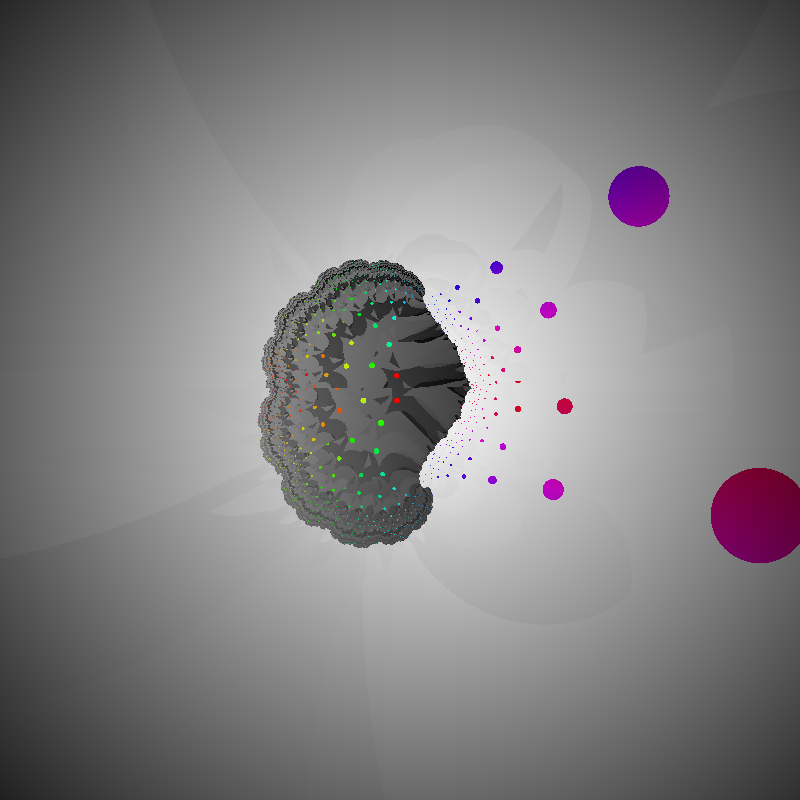

In [10]:
Ic = gu.Z_ET_to_show((Z-Z0), ET)
display(Ic)